# Exercise 4: Extracting Quantitative Measures from EEG spectra 

### This exercise makes use of data from the paper 

### Dissociable Decoding of Working Memory and Spatial Attention from EEG Oscillations and Sustained Potentials"

#### Bae, G. Y., & Luck, S. J. (2018). Dissociable Decoding of Spatial Attention and Working Memory from EEG Oscillations and Sustained Potentials. Journal of Neuroscience, 38(2), 409-422.

#### The paper is available in the readings folder.  

## This data set is potentially a very good data set to use for your final project as it is information rich. 

#### Having said that, I dislike many aspects of the paper.  

#### Load modules that we need 

In [47]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft 
from scipy import signal



In [48]:
data = loadmat('data/wm_orientation_506.mat')



In [49]:
data.keys()


dict_keys(['angle', 'channel', 'channel_names', 'eeg', 'response', 'samplingrate', 'time'])

In [50]:
#extract the variables from the dictionary 
eeg = data['eeg']
channel_names = data['channel_names']
angle = np.int16(data['angle'][0])
response = np.int16(data['response'][0])
samplingrate = int(data['samplingrate'][0])
time = np.int16(data['time'][0])
stimsamp = 375 #I looked at time to figure this out.  
ntrials = eeg.shape[0]
nchannels = eeg.shape[1]
nsamps = eeg.shape[2]

## README 

![Experiment](img/BaeLuckFigure1.jpg)

### In this experiment, participants are presented tear drops of different orientation for 200 ms.  

### After a delay period of 1300 ms, they rotate an arrow to match the orientation presented. 

### The data presented includes 1500 ms before the stimulus presented, 200 ms of stimulus presentation and 1300 ms of hold period. 

### The response period is not included. 

###  The variables contained here are 


*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `time` - the time relative to *stimulus onset* in each EEG observation.
*   `channel_names` - the name of the EEG channels indicating where it is located.    
*   `angle` - the angle of the teardrop stimulus  
*   `response` - the angle reported by the subject. 



## Compute an event-related potential as a reality check 

In [51]:
erp = np.mean(eeg,axis = 0)

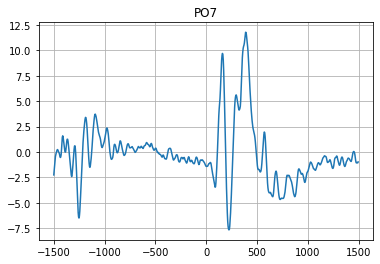

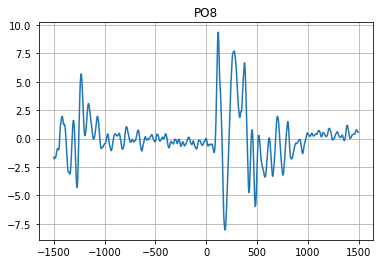

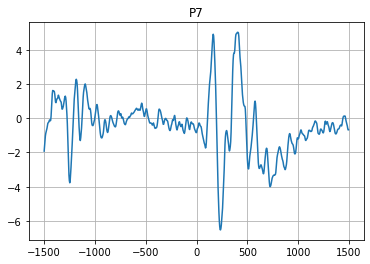

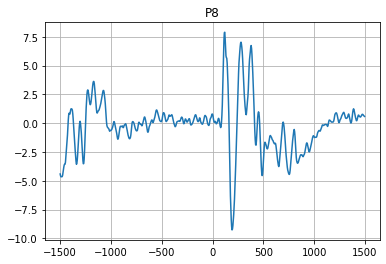

In [52]:
for j in [11,25,9,22]:
    plt.figure()
    plt.plot(time,np.transpose(erp[j,:]))
    plt.grid()
    plt.title(channel_names[j])


## Spectral Analysis of all of the data simultaneously

### Compute the spectrum prior to stimulus presentation

In [53]:
prestim = range(125,375,1)
T = 1 
deltaf = 1/T
nsamp = len(prestim)
nf = int(nsamp/2)
f = np.arange(0,nf)*deltaf
fft_eeg = fft(eeg[:,:,prestim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf

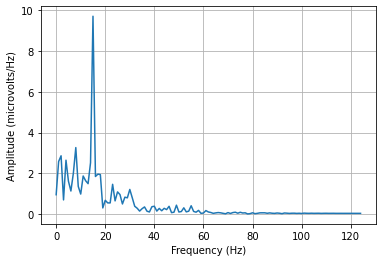

In [54]:
trial = 0
channel = 11
plt.plot(f[range(nf)],amplitude[trial,channel,range(nf)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.show()

In [55]:
amplitude_prestim = np.mean(amplitude,axis = 0)

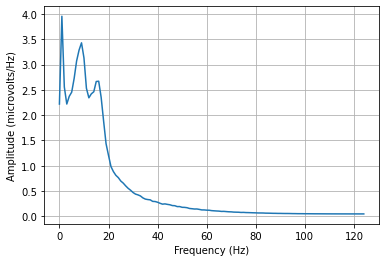

In [56]:
plt.plot(f[range(nf)],amplitude_prestim[channel,range(nf)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.show()

### Now lets repeat that calculation after the stimulus presentation 

In [57]:
poststim = range(375,625,1)
T = 1 
deltaf = 1/T
nsamp = len(poststim)
nf = int(nsamp/2)
f = np.arange(0,nf)*deltaf
fft_eeg = fft(eeg[:,:,poststim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf
amplitude_poststim = np.mean(amplitude,axis = 0)

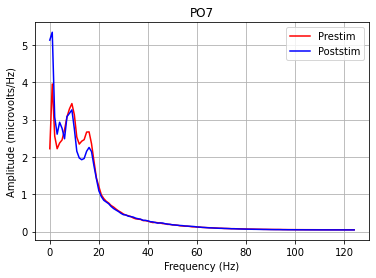

In [58]:
plt.plot(f[range(nf)],amplitude_prestim[channel,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_poststim[channel,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend(('Prestim','Poststim'))
plt.title(channel_names[channel])
plt.show()

## Let's average the amplitude spectra separately by the angle of the stimulus 

In [59]:
amplitude_by_angle = dict()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)

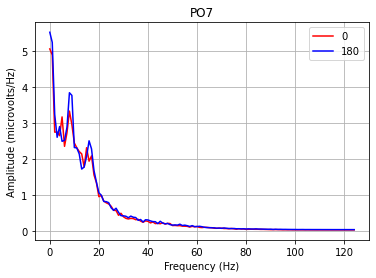

In [60]:
plt.plot(f[range(nf)],amplitude_by_angle[0][channel,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle[180][channel,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel])
plt.show()

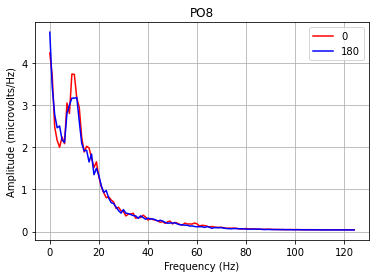

In [63]:
channel2 = 25
plt.plot(f[range(nf)],amplitude_by_angle[0][channel2,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle[180][channel2,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel2])
plt.show()

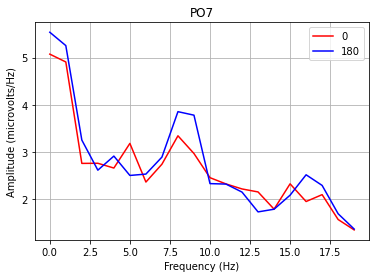

In [65]:
maxf = 20
maxbin = maxf/deltaf
channel = 11
plt.plot(f[range(maxf)],amplitude_by_angle[0][channel,range(maxf)],'r')
plt.plot(f[range(maxf)],amplitude_by_angle[180][channel,range(maxf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel])
plt.show()


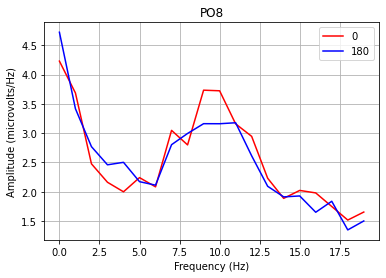

In [66]:
maxf = 20
maxbin = maxf/deltaf
channel2 = 25
plt.plot(f[range(maxf)],amplitude_by_angle[0][channel2,range(maxf)],'r')
plt.plot(f[range(maxf)],amplitude_by_angle[180][channel2,range(maxf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel2])
plt.show()

In [69]:
#The dictionary indexes the angle
#first index is the channel
#second index is the frequency 
amplitude_by_angle[0][channel,10]


2.4558688719737995